<a href="https://colab.research.google.com/github/SreejithJP/intership/blob/main/rainfall_using_CTP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

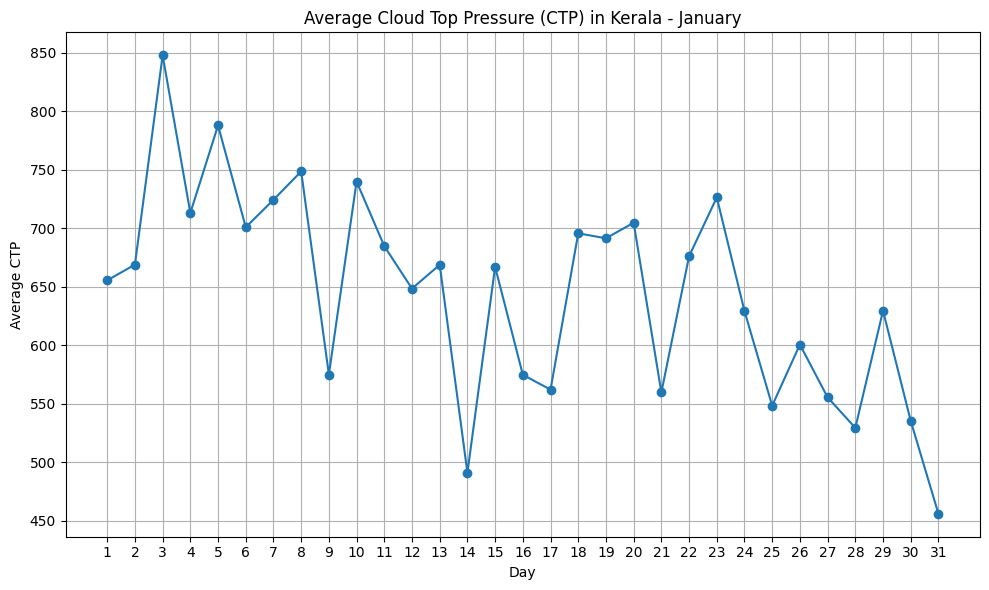

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is stored in a list named ctp_values
ctp_values = [
    655.410292620767, 668.807373713766, 847.688163584387, 712.967482188583, 787.752780440333,
    700.754656024757, 724.204668637620, 748.429727197424, 574.940387096984, 739.776568763617,
    684.610585170524, 648.358023618600, 668.685585455727, 491.018399586645, 666.942385934567,
    574.704491267729, 562.028193996825, 695.577382037368, 691.314329519128, 704.601011340728,
    559.628878491000, 675.969363760180, 726.224966959492, 629.138961134085, 548.317369748961,
    600.575023328974, 555.405858725956, 529.403357478141, 629.448711295737, 535.338152799865,
    455.961704475264
]

# Create a DataFrame from the list
ctp_data = pd.DataFrame({'Day': range(1, 32), 'Avg_CTP': ctp_values})

# Visualize the data
plt.figure(figsize=(10, 6))
plt.plot(ctp_data['Day'], ctp_data['Avg_CTP'], marker='o', linestyle='-')
plt.title('Average Cloud Top Pressure (CTP) in Kerala - January')
plt.xlabel('Day')
plt.ylabel('Average CTP')
plt.xticks(range(1, 32))
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Assuming ctp_data is your DataFrame containing the CTP data
# If you haven't loaded the data yet, ensure to load it first

# Create lag features for the average CTP
num_lags = 7  # Number of lag features to create (you can adjust this as needed)
for i in range(1, num_lags + 1):
    ctp_data[f'Avg_CTP_Lag_{i}'] = ctp_data['Avg_CTP'].shift(i)

# Drop rows with missing values introduced by creating lag features
ctp_data.dropna(inplace=True)

# Display the updated DataFrame
print(ctp_data.head())


    Day     Avg_CTP  Avg_CTP_Lag_1  Avg_CTP_Lag_2  Avg_CTP_Lag_3  \
7     8  748.429727     724.204669     700.754656     787.752780   
8     9  574.940387     748.429727     724.204669     700.754656   
9    10  739.776569     574.940387     748.429727     724.204669   
10   11  684.610585     739.776569     574.940387     748.429727   
11   12  648.358024     684.610585     739.776569     574.940387   

    Avg_CTP_Lag_4  Avg_CTP_Lag_5  Avg_CTP_Lag_6  Avg_CTP_Lag_7  
7      712.967482     847.688164     668.807374     655.410293  
8      787.752780     712.967482     847.688164     668.807374  
9      700.754656     787.752780     712.967482     847.688164  
10     724.204669     700.754656     787.752780     712.967482  
11     748.429727     724.204669     700.754656     787.752780  


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Split the data into training and validation sets (e.g., using an 80-20 split)
train_size = int(len(ctp_data) * 0.8)
train_data = ctp_data[:train_size]
valid_data = ctp_data[train_size:]

# Define and fit the ARIMA model
model = ARIMA(train_data['Avg_CTP'], order=(5, 1, 0))
model_fit = model.fit()

# Reset index of the validation data
valid_data.reset_index(drop=True, inplace=True)

# Make predictions on the validation set
predictions = model_fit.predict(start=0, end=len(valid_data)-1)

# Evaluate the model using mean squared error
mse = mean_squared_error(valid_data['Avg_CTP'], predictions)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 85809.62643497948


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
# Specify the number of steps ahead to forecast
forecast_steps = 7  # Example: Forecast for the next 7 days

# Make predictions for future time periods
forecast = model_fit.forecast(steps=forecast_steps)

# Print the forecasted values
print("Forecasted CTP values for the next 7 days:")
print(forecast)


Forecasted CTP values for the next 7 days:
19    679.678087
20    624.913988
21    562.986177
22    590.431182
23    642.201676
24    633.341419
25    578.050943
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Split the data into training and validation sets (e.g., using an 80-20 split)
train_size = int(len(ctp_data) * 0.8)
train_data = ctp_data[:train_size]
valid_data = ctp_data[train_size:]

# Define and fit the SARIMA model
model = SARIMAX(train_data['Avg_CTP'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
# Example order and seasonal_order parameters; modify as needed
model_fit = model.fit()

# Reset index of the validation data
valid_data.reset_index(drop=True, inplace=True)

# Make predictions on the validation set
predictions = model_fit.predict(start=0, end=len(valid_data)-1)

# Evaluate the model using mean squared error
mse = mean_squared_error(valid_data['Avg_CTP'], predictions)
print(f"Mean Squared Error: {mse}")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Mean Squared Error: 89843.31917875646


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [40]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Step 2: Load the dataset
# Step 2: Load the dataset with specified encoding
dataset = pd.read_csv('/content/drive/MyDrive/Dataset/__new.csv', encoding='latin1')

# Step 3: Data Preprocessing
# Check for missing values
print(dataset.isnull().sum())

# If there are missing values, you can handle them by imputing or dropping them
# For example, to impute missing values with the mean:
dataset.fillna(dataset.mean(), inplace=True)

# Step 4: Split the data into features (X) and target variable (y)
X = dataset.drop(columns=['CTP'])  # Features
y = dataset['CTP']  # Target variable

# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Model Selection and Training
# Initialize the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)


# Train the model
model.fit(X_train, y_train)

# Step 7: Model Evaluation
# Make predictions on the testing set
predictions = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# Step 8: Prediction (Optional)
# If you want to make predictions on new data, you can use the trained model
# For example:
# Correct the feature names in the new data frame to match those used during model training
# Correct the feature names in the new data frame to match those used during model training
new_data = pd.DataFrame({'ï»¿Temperature (Â°F)': [56.9], 'Dew Point (Â°F)': [50.1], 'Humidity (%)': [79.8], 'Wind Speed (mph)': [1.5]})
predicted_ctp = model.predict(new_data)
print("Predicted Cloud Top Pressure:", predicted_ctp)


ï»¿Temperature (Â°F)    0
Dew Point (Â°F)         0
Humidity (%)            0
Wind Speed (mph)        0
CTP                     0
dtype: int64
Mean Squared Error: 12114.966751321059
Predicted Cloud Top Pressure: [576.86883873]


In [23]:
print(dataset.columns)


Index(['Time', 'Temperature (°F)', 'Unnamed: 2', 'Unnamed: 3',
       'Dew Point (°F)', 'Unnamed: 5', 'Unnamed: 6', 'Humidity (%)',
       'Unnamed: 8', 'Unnamed: 9', 'Wind Speed (mph)', 'Unnamed: 11',
       'Unnamed: 12', 'Pressure (in)', 'Unnamed: 14', 'Unnamed: 15',
       'Precipitation (in)'],
      dtype='object')
